In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from matplotlib.category import UnitData
plt.style.use("default")

In [21]:
"""
Import US births dataset: https://www.kaggle.com/datasets/mysarahmadbhat/us-births-2000-to-2014/data
"""
df = pd.read_csv("US_births_2000-2014_SSA.csv")

In [22]:
df.head

<bound method NDFrame.head of       year  month  date_of_month  day_of_week  births
0     2000      1              1            6    9083
1     2000      1              2            7    8006
2     2000      1              3            1   11363
3     2000      1              4            2   13032
4     2000      1              5            3   12558
...    ...    ...            ...          ...     ...
5474  2014     12             27            6    8656
5475  2014     12             28            7    7724
5476  2014     12             29            1   12811
5477  2014     12             30            2   13634
5478  2014     12             31            3   11990

[5479 rows x 5 columns]>

# 1) Basic EDA

## 1.1) Plot the total births by year

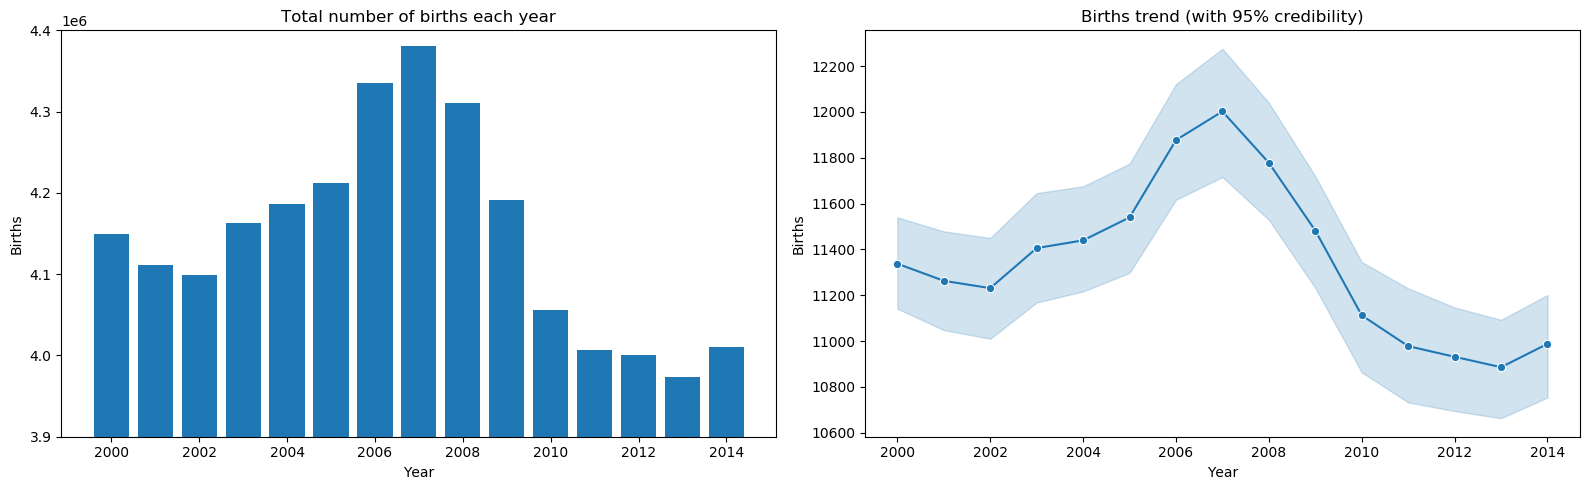

In [61]:
# Grouping data by year and summing the births 
grouped = df.groupby('year')['births'].sum()

# histogram of births by year
fig = plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Births')
plt.title('Total number of births each year')
plt.ylim(3.9e6, 4.4e6)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) # Formatting y-axis ticks in scientific notation

# plot with seaborn
plt.subplot(1,2,2)
sns.lineplot(x = df['year'],y = df['births'], marker="o")
plt.xlabel("Year")
plt.ylabel("Births")
plt.title("Births trend (with 95% credibility)")

plt.tight_layout()
plt.show()

## 1.2) Plot the births by month

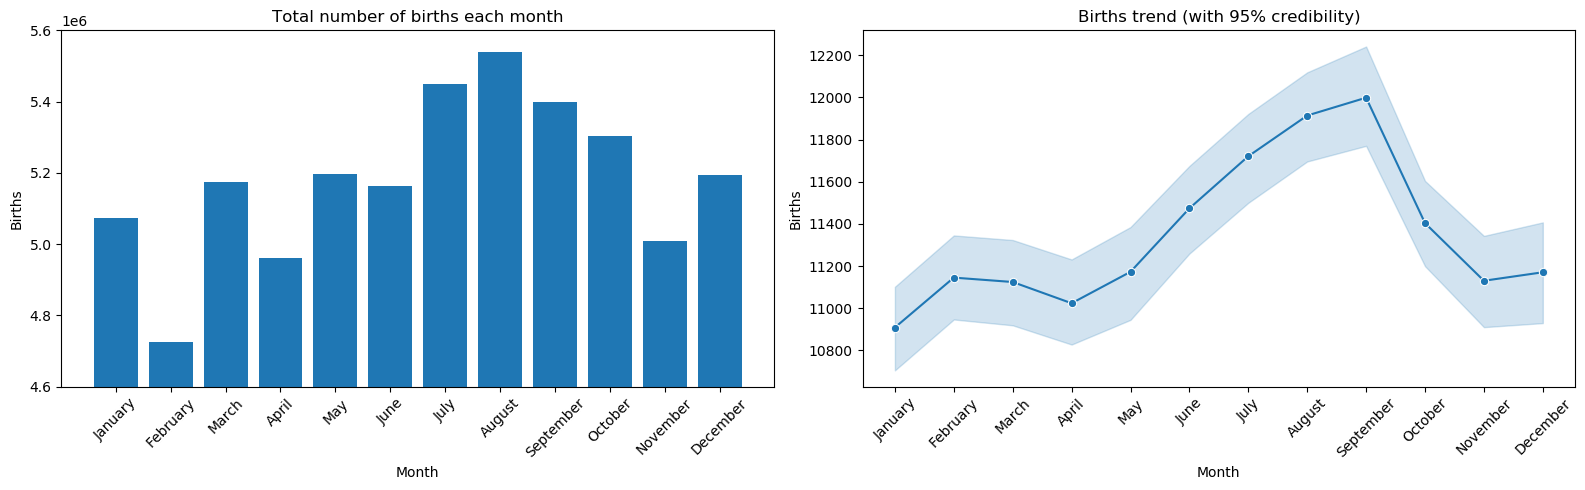

In [57]:
dict={1:'January',
      2:'February',
      3:'March',
      4:'April',
      5:'May',
      6:'June',
      7:'July',
      8:'August',
      9:'September',
      10:'October',
      11:'November',
      12:'December'}
months = list(dict.values())
df['month_literal'] = df.month.map(dict) # create a column with literal names of months
df["month_literal"] = pd.Categorical(df["month_literal"], months) # set the order of the months

# Grouping data by year and summing the births 
grouped = df.groupby('month_literal')['births'].sum()

fig = plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)

# histogram of births by year
plt.bar(grouped.index, grouped.values, xunits=UnitData(months))
plt.xlabel('Month')
plt.ylabel('Births')
plt.title('Total number of births each month')
plt.ylim(4.6e6, 5.6e6)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) # Formatting y-axis ticks in scientific notation
plt.xticks(rotation=45)

# plot with seaborn
plt.subplot(1,2,2)
sns.lineplot(x = df['month_literal'],y = df['births'], marker="o")
plt.xlabel("Month")
plt.ylabel("Births")
plt.title("Births trend (with 95% credibility)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 1.3) Plot by day of week

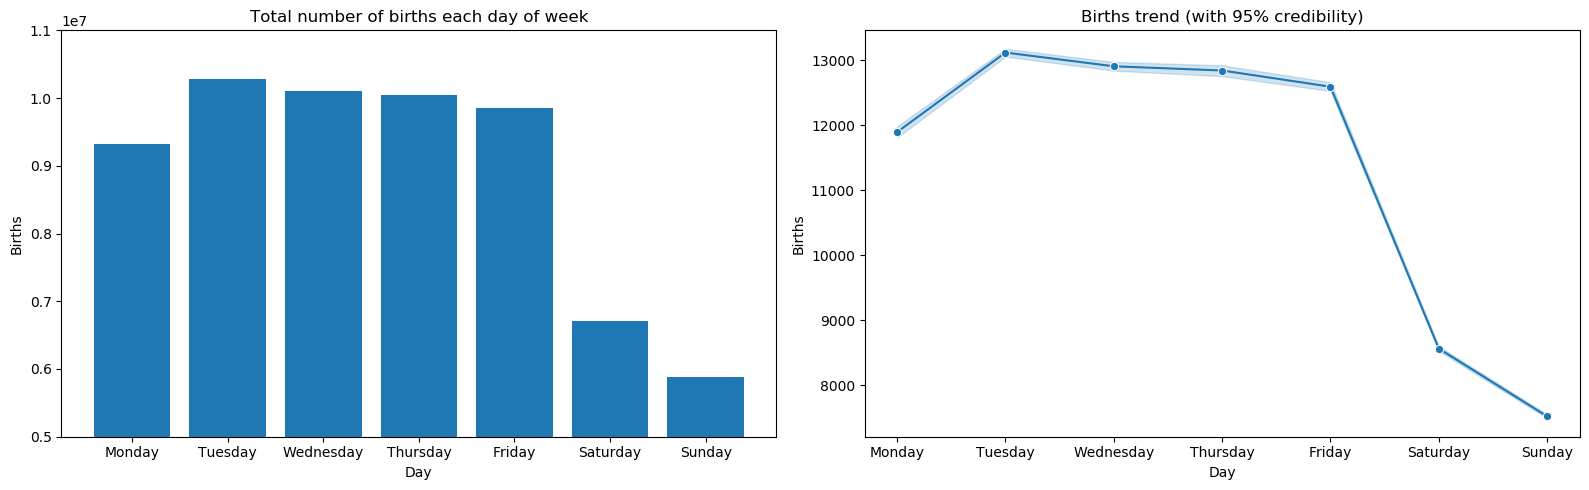

In [50]:
dict={1:'Monday', 
      2:'Tuesday', 
      3:'Wednesday', 
      4:'Thursday', 
      5:'Friday', 
      6:'Saturday', 
      7:'Sunday'}
days_of_week = list(dict.values())
df['day_of_week_literal'] = df.day_of_week.map(dict) # create a column with literal names of week days
df["day_of_week_literal"] = pd.Categorical(df["day_of_week_literal"], days_of_week) # set the order of the week days

# Grouping data by year and summing the births 
grouped = df.groupby('day_of_week_literal')['births'].sum()

fig, ax = plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
# histogram of births by year
plt.bar(grouped.index, grouped.values, 
        xunits=UnitData(days_of_week))
plt.xlabel('Day')
plt.ylabel('Births')
plt.title('Total number of births each day of week')
plt.ylim(5e6, 1.1e7)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) # Formatting y-axis ticks in scientific notation

# plot with seaborn
plt.subplot(1,2,2)
sns.lineplot(x = df['day_of_week_literal'],
             y = df['births'], 
             marker = "o")
plt.xlabel("Day")
plt.ylabel("Births")
plt.title("Births trend (with 95% credibility)")

plt.tight_layout()
plt.show()

# 2) Compare births with lunar phases

In [7]:
"""
Import UK births dataset: https://www.kaggle.com/datasets/polytopicowl/moonrise-moonset-and-phase-uk-2005-2017
"""
moon_data = pd.read_csv("UK_Lunar_Data.csv")
print(moon_data.info)

<bound method DataFrame.info of             Date MoonriseEarly Moonset MoonriseLate          Phase PhaseTime  \
0     01-01-2005           NaN   11:11        22:11            NaN       NaN   
1     02-01-2005           NaN   11:23        23:25            NaN       NaN   
2     03-01-2005           NaN   11:34          NaN  Third Quarter     17:45   
3     04-01-2005         00:40   11:45          NaN            NaN       NaN   
4     05-01-2005         02:00   12:00          NaN            NaN       NaN   
...          ...           ...     ...          ...            ...       ...   
4743  27-12-2017           NaN   00:38        12:39            NaN       NaN   
4744  28-12-2017           NaN   01:51        13:05            NaN       NaN   
4745  29-12-2017           NaN   03:07        13:34            NaN       NaN   
4746  30-12-2017           NaN   04:26        14:10            NaN       NaN   
4747  31-12-2017           NaN   05:44        14:54            NaN       NaN   

     Ci

In [9]:
# select only the birth_df from 2005 to 2017
births_2005_2014 = df[(df["year"] >= 2005) & (df["year"] <= 2014)]
births_2005_2014 = births_2005_2014.reset_index(drop=True) # reset counting of the indexes

# add the phase columns
births_2005_2014["phase"] = moon_data["Phase"] 

# map phase name to numerical
births_2005_2014['phase_numerical'] = births_2005_2014['phase'].map({"Full Moon":1,
                                                                   "Third Quarter":0.5,
                                                                   "First Quarter":0.5,
                                                                     "New Moon":0.0})

# convert NaN to interpolated values
births_2005_2014["phase_numerical"] = births_2005_2014["phase_numerical"].astype(float).interpolate()
births_2005_2014 = births_2005_2014.iloc[2:-4] # remove errors in numerical phase
births_2005_2014 = births_2005_2014.reset_index(drop=True) # reset counting of the indexes

#print(births_2005_2014.info)

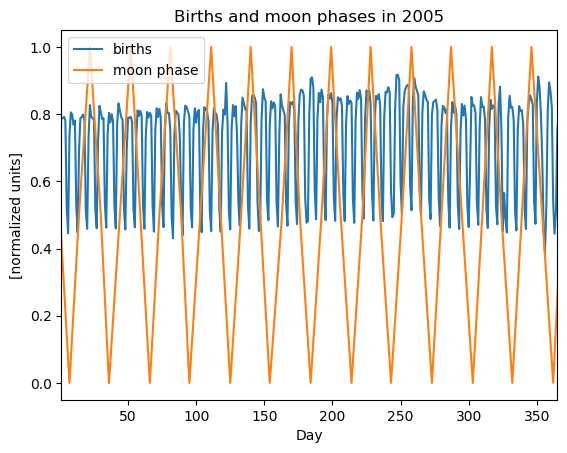

In [58]:
fig = plt.figure()
plt.plot(births_2005_2014["births"]/max(births_2005_2014["births"]), label="births")
plt.plot(births_2005_2014["phase_numerical"], label="moon phase")
plt.xlim(1, 365)
plt.xlabel("Day")
plt.ylabel("[normalized units]")
plt.title("Births and moon phases in 2005")
plt.legend()

## 2.1) Fourier analysis

In [11]:
# FFT transform
def FFT(df, column):
    X = fft(df[column])
    N = len(X)
    n = np.arange(len(X))

    # get the sampling rate
    sr = 1 / (24*60*60) # [Hz]
    T = N/sr
    freq = n/T 

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]
    
    return X, n_oneside, f_oneside

X_births, n, f = FFT(births_2005_2014, "births")
X_moon,   n, f = FFT(births_2005_2014, "phase_numerical")

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


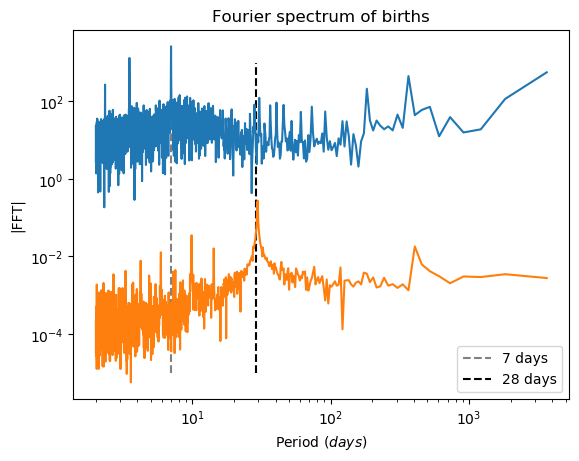

In [13]:
# convert frequency to days
t_d = 1/ f / (24 * 60 * 60)

fig = plt.figure()
plt.vlines(x=7, ymin=1e-5, ymax=1e3, color="gray", ls="dashed", label="7 days")
plt.vlines(x=29, ymin=1e-5, ymax=1e3, color="black", ls="dashed", label="28 days")
plt.plot(t_d, np.abs(X_births[:n])/n)
plt.plot(t_d, np.abs(X_moon[:n])/n)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("|FFT|")
plt.xlabel('Period ($days$)')
plt.title("Fourier spectrum of births")

plt.legend()

Births show strong period of 7 days (weekly modulation) while lunar data show a peak in the spectrum of 28 days. The births do not shown any periodicity coming from moon phase.

Text(0.5, 1, 'Correlation Matrix')

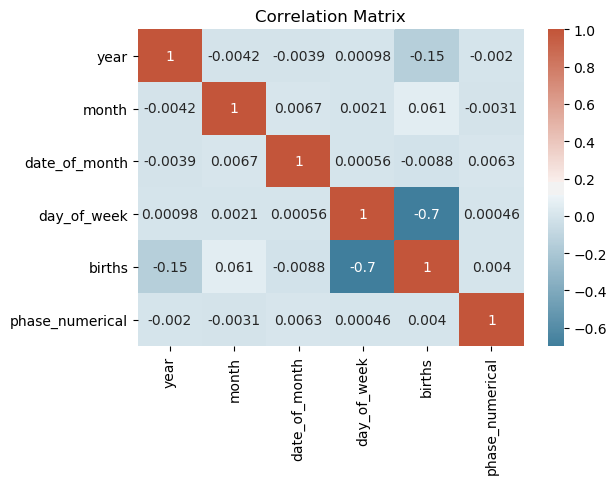

In [ ]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure()
corr = births_2005_2014.corr()
sns.heatmap(corr, 
            cmap=cmap, 
            annot=True)
plt.tight_layout()
plt.title("Correlation Matrix")


Data show no significant correlation between the number of births and the lunar phase.